In [268]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video


resolution = 30 #pixels/micron

freq = 1/1.55 # We work typically at 1550 nm wavelength (1.55 micron)
sio2 = mp.Medium(index=1.444) # glass surrounding waveguide

cell = mp.Vector3(16,8,0)
geometry = [mp.Block(mp.Vector3(mp.inf,0.5,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12))]

sources = [
    mp.EigenModeSource(src=mp.ContinuousSource(frequency=freq),
        component=mp.Ez,
        center=mp.Vector3(-7,0),
        direction = mp.X,
        size=mp.Vector3(0,1)                                     
    )
]

# sources = [
#     mp.EigenModeSource(
#         src=mp.GaussianSource(wavelength=2 * (11**0.5), width=10),
#         component=mp.Ez,
#         center=mp.Vector3(-7, -3.5),
#         size=mp.Vector3(0, 1),
#     )
# ]

# sources = [
#     mp.EigenModeSource(
#         src=mp.GaussianSource(freq,fwidth=0.2*freq, width=2),
#             center=mp.Vector3(-7,0),
#             size=mp.Vector3(0,1),
#             component=mp.Ez
#     )
# ]


pml_layers = [mp.PML(1.0)]



/Users/JohnMihal/anaconda3/envs/mp/lib/python3.11/site-packages/meep/source.py:592: RuntimeWarning: EigenModeSource component is not ALL_COMPONENTS (the default), which makes it non-unidirectional.
  warnings.warn(


In [269]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution,
                    default_material=sio2)

# fluxEnd = sim.add_mode_monitor(freq, 0, 1, 
#                             mp.ModeRegion(center=mp.Vector3(x=5),size=mp.Vector3(y=1)), 
#                             decimation_factor=0)

# fluxStart = sim.add_mode_monitor(freq, 0, 1, 
#                             mp.ModeRegion(center=mp.Vector3(x=-3),size=mp.Vector3(y=1)), 
#                             decimation_factor=0)

# sim.run(until_after_sources=mp.stop_when_fields_decayed(100, mp.Ez, pt=mp.Vector3(x=5), decay_by=1e-9))
sim.run(until=10)


-----------
Initializing structure...
time for choose_chunkdivision = 0.00018096 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 30
     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.117717 s
-----------
MPB solved for frequency_1(2.2349,0,0) = 0.683463 after 24 iters
MPB solved for frequency_1(2.09819,0,0) = 0.645184 after 7 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 3 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 1 iters


FloatProgress(value=0.0, description='0% done ', max=10.0)

run 0 finished at t = 10.0 (600 timesteps)


     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


<Axes: xlabel='X', ylabel='Y'>

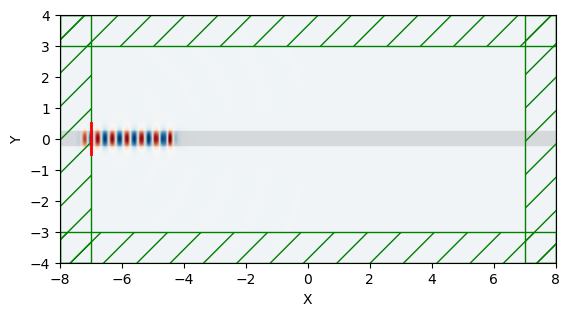

In [270]:
sim.plot2D(fields=mp.Ez, 
           field_parameters={'alpha':0.9})

In [277]:
f = plt.figure(dpi=150)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(0.5, Animate), until=10)
plt.close()

filename = "straight_waveguide.mp4"
fps = 10
Animate.to_mp4(fps, filename)
Video(filename)

FloatProgress(value=20.0, description='0% done ', max=30.0, min=20.0)

     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
on time step 1200 (time=20), 0.0486822 s/step
Normalizing field data...
run 2 finished at t = 30.0 (1800 timesteps)
Generating MP4...


In [272]:
res = sim.get_eigenmode_coefficients(fluxEnd,bands=[1])

MPB solved for frequency_1(2.2349,0,0) = 0.683463 after 24 iters
MPB solved for frequency_1(2.09819,0,0) = 0.645184 after 7 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 3 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 1 iters
Dominant planewave for band 1: (2.098108,-0.000000,0.000000)


In [273]:
t = res.alpha[0][0][0]
np.abs(t)**2

25.409384638133393

In [274]:
mp.get_fluxes(fluxEnd)

[25.415206786502427]

In [275]:
sources[0]

In [276]:
mp.get_fluxes(fluxStart)

[25.417801468320317]